In [1]:
import numpy as np
import pandas as pd

/home/jann/Desktop/repos/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jann/Desktop/repos/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


* vom assumptions + carrier_prices + efficiency
* lca
* Konzept für Uncertainty ub, lb, ref

In [142]:
dict_cost = {'technology': ['chp_coal', 
                             'chp_gas',
                             'gas_boiler_central',
                             'gas_boiler_decentral',
                             'pth_resistive',
                             'pth_heat_pump_central',
                             'pth_heat_pump_decentral',
                             'heat_distribution_costs'],
              'efficiency': [np.nan, 0.468, 0.9, 0.9, 0.9, 2, 2, np.nan],
              'capex': [np.nan, 600, 63, 175, 100, 700, 1050, np.nan],
              'capex_unit': ['Eur/kW_th']*8,
              'lifetime': [np.nan, 25, 22, 20, 20, 20, 20, np.nan],
              'lifetime_unit': ['a']*8,
              'wacc': [0.07, 0.07, 0.07, 0.04, 0.07, 0.07, 0.04, 0.07],
              'fom': [np.nan, 3, 1, 2, 2, 3.5, 3.5, np.nan],
              'fom_unit': ['%/a']*8,
              'vom': [np.nan, 0.003, 0.003, 0.003, np.nan, np.nan, np.nan, np.nan],
              'vom_unit': ['Eur/kWh']*8,
              'carrier_price': [np.nan, 0.0216, 0.0216, 0.0216, 0.085, 0.085, 0.085, np.nan],
              'carrier_price_unit': ['Eur/kWh']*8,
              'reference': ['']+['Brown2018']*6+['']
             }
cost_inputs = pd.DataFrame(dict_cost)
cost_inputs.to_csv('cost_inputs.csv')
cost_inputs

,technology,efficiency,capex,capex_unit,lifetime,lifetime_unit,wacc,fom,fom_unit,vom,vom_unit,carrier_price,carrier_price_unit,reference
0,chp_coal,NaN,NaN,Eur/kW_th,NaN,a,0.07,NaN,%/a,NaN,Eur/kWh,NaN,Eur/kWh,
1,chp_gas,0.468,600.0,Eur/kW_th,25.0,a,0.07,3.0,%/a,0.003,Eur/kWh,0.0216,Eur/kWh,Brown2018
2,gas_boiler_central,0.900,63.0,Eur/kW_th,22.0,a,0.07,1.0,%/a,0.003,Eur/kWh,0.0216,Eur/kWh,Brown2018
3,gas_boiler_decentral,0.900,175.0,Eur/kW_th,20.0,a,0.04,2.0,%/a,0.003,Eur/kWh,0.0216,Eur/kWh,Brown2018
4,pth_resistive,0.900,100.0,Eur/kW_th,20.0,a,0.07,2.0,%/a,NaN,Eur/kWh,0.0850,Eur/kWh,Brown2018
5,pth_heat_pump_central,2.000,700.0,Eur/kW_th,20.0,a,0.07,3.5,%/a,NaN,Eur/kWh,0.0850,Eur/kWh,Brown2018
6,pth_heat_pump_decentral,2.000,1050.0,Eur/kW_th,20.0,a,0.04,3.5,%/a,NaN,Eur/kWh,0.0850,Eur/kWh,Brown2018
7,heat_distribution_costs,NaN,NaN,Eur/kW_th,NaN,a,0.07,NaN,%/a,NaN,Eur/kWh,NaN,Eur/kWh,


In [143]:
dict_emissions = {'technology': ['chp_coal', 
                             'chp_gas',
                             'gas_boiler_central',
                             'gas_boiler_decentral',
                             'pth_resistive',
                             'pth_heat_pump_central',
                             'pth_heat_pump_decentral',
                             'heat_distribution_costs'],
              'efficiency': [np.nan, 0.468, 0.9, 0.9, 0.9, 2, 2, np.nan],
              'spec_emission_cap': [np.nan, 600, 63, 175, 100, 700, 1050, np.nan],
              'spec_emission_cap_unit': ['tCO2/kW']*8,
              'lifetime': [np.nan, 25, 22, 20, 20, 20, 20, np.nan],
              'lifetime_unit': ['a']*8,
              'spec_emission_var': [np.nan, 25, 22, 20, 20, 20, 20, np.nan],
              'spec_emission_var_unit': ['tCO2/kW']*8,
              'reference': ['']+['Brown2018']*6+['']
             }

emission_inputs = pd.DataFrame(dict_emissions)
cost_inputs.to_csv('emission_inputs.csv')
emission_inputs

,technology,efficiency,spec_emission_cap,spec_emission_cap_unit,lifetime,lifetime_unit,spec_emission_var,spec_emission_var_unit,reference
0,chp_coal,NaN,NaN,tCO2/kW,NaN,a,NaN,tCO2/kW,
1,chp_gas,0.468,600.0,tCO2/kW,25.0,a,25.0,tCO2/kW,Brown2018
2,gas_boiler_central,0.900,63.0,tCO2/kW,22.0,a,22.0,tCO2/kW,Brown2018
3,gas_boiler_decentral,0.900,175.0,tCO2/kW,20.0,a,20.0,tCO2/kW,Brown2018
4,pth_resistive,0.900,100.0,tCO2/kW,20.0,a,20.0,tCO2/kW,Brown2018
5,pth_heat_pump_central,2.000,700.0,tCO2/kW,20.0,a,20.0,tCO2/kW,Brown2018
6,pth_heat_pump_decentral,2.000,1050.0,tCO2/kW,20.0,a,20.0,tCO2/kW,Brown2018
7,heat_distribution_costs,NaN,NaN,tCO2/kW,NaN,a,NaN,tCO2/kW,


In [149]:
def annuity(capex, n, wacc):
    """Calculate the annuity.

    annuity = capex * (wacc * (1 + wacc) ** n) / ((1 + wacc) ** n - 1)

    Parameters
    ----------
    capex : float
        Capital expenditure (NPV of investment)
    n : int
        Number of years that the investment is used (economic lifetime)
    wacc : float
        Weighted average cost of capital

    Returns
    -------
    float : annuity

    """
    return capex * (wacc * (1 + wacc) ** n) / ((1 + wacc) ** n - 1)


def get_cost_results(cost_inputs,
                     inst_capacity,
                     full_load_hours,
                     annuity,
                     factor_el,
                     factor_th):
    r""""
    
    Params
    -------
    cost_inputs : pd.DataFrame
    inst_capacity : float
    full_load_hours : float
    annuity : function
    factor_el : float
    factor_th : float
    
    Returns
    -------
    results : pd.DataFrame
    """
    total_costs = lambda x: annuity(x['capex'], x['lifetime'], x['wacc'])*inst_capacity \
        + x['capex']*x['fom']*inst_capacity \
        + x['vom']*full_load_hours + x['carrier_price']*1/x['efficiency']*full_load_hours
    lcoe = lambda x: factor_el * total_costs(x)/(full_load_hours*inst_capacity)
    lcoh = lambda x: factor_th * total_costs(x)/(full_load_hours*inst_capacity)

    results = pd.DataFrame()
    results['technology'] = cost_inputs['technology']
    results['inst_capacity'] = inst_capacity
    results['full_load_hours'] = full_load_hours
    results['factor_el'] = factor_el  
    results['factor_th'] = factor_th         
    results['total_costs'] = cost_inputs.apply(total_costs, 1)
    results['total_costs_unit'] = 'Eur'
    results['lcoe'] = cost_inputs.apply(lcoe, 1)
    results['lcoe_unit'] = 'Eur/kW_el'
    results['lcoh'] = cost_inputs.apply(lcoh, 1)
    results['lcoh_unit'] = 'Eur/kW_th'
    return results


def get_emission_results(emission_inputs,
                         inst_capacity,
                         full_load_hours):
    r""""
    
    Params
    -------
    emission_inputs : pd.DataFrame
    inst_capacity : float
    full_load_hours : float
    
    Returns
    -------
    results: pd.DataFrame
    """
    results = pd.DataFrame()
    results['technology'] = emission_inputs['technology']
    results['inst_capacity'] = inst_capacity
    results['full_load_hours'] = full_load_hours
    emissions = lambda x: x['spec_emission_cap']*inst_capacity + x['spec_emission_var']*full_load_hours
    results['emissions'] = emission_inputs.apply(emissions, 1)
    results['emissions_unit'] = 'tCO2'
    return results


inst_capacity = 1.
full_load_hours = 4000
factor_el = 0.5
factor_th = 0.5
cost_results = get_cost_results(cost_inputs, inst_capacity, full_load_hours, annuity, factor_el, factor_th)
emission_results = get_emission_results(emission_inputs, inst_capacity, full_load_hours)

In [150]:
import seaborn as sns

cm = sns.light_palette("red", as_cmap=True)
cost_results.style.background_gradient(cmap=cm)

/home/jann/Desktop/repos/venv/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,technology,inst_capacity,full_load_hours,factor_el,factor_th,total_costs,total_costs_unit,lcoe,lcoe_unit,lcoh,lcoh_unit
0,chp_coal,1,4000,0.5,0.5,nan,Eur,nan,Eur/kW_el,nan,Eur/kW_th
1,chp_gas,1,4000,0.5,0.5,2048.1,Eur,0.256013,Eur/kW_el,0.256013,Eur/kW_th
2,gas_boiler_central,1,4000,0.5,0.5,176.696,Eur,0.0220869,Eur/kW_el,0.0220869,Eur/kW_th
3,gas_boiler_decentral,1,4000,0.5,0.5,470.877,Eur,0.0588596,Eur/kW_el,0.0588596,Eur/kW_th
4,pth_resistive,1,4000,0.5,0.5,nan,Eur,nan,Eur/kW_el,nan,Eur/kW_th
5,pth_heat_pump_central,1,4000,0.5,0.5,nan,Eur,nan,Eur/kW_el,nan,Eur/kW_th
6,pth_heat_pump_decentral,1,4000,0.5,0.5,nan,Eur,nan,Eur/kW_el,nan,Eur/kW_th
7,heat_distribution_costs,1,4000,0.5,0.5,nan,Eur,nan,Eur/kW_el,nan,Eur/kW_th


In [151]:
cm = sns.light_palette("red", as_cmap=True)
emission_results.style.background_gradient(cmap=cm)

,technology,inst_capacity,full_load_hours,emissions,emissions_unit
0,chp_coal,1,4000,nan,tCO2
1,chp_gas,1,4000,100600,tCO2
2,gas_boiler_central,1,4000,88063,tCO2
3,gas_boiler_decentral,1,4000,80175,tCO2
4,pth_resistive,1,4000,80100,tCO2
5,pth_heat_pump_central,1,4000,80700,tCO2
6,pth_heat_pump_decentral,1,4000,81050,tCO2
7,heat_distribution_costs,1,4000,nan,tCO2


# Plot total costs/emissions vs. full_load_hours 

In [152]:
cost_results = pd.DataFrame()
for full_load_hours in [1000,4000,8000]:
    cost_results = cost_results.append(get_cost_results(cost_inputs, inst_capacity, full_load_hours, annuity, factor_el, factor_th))

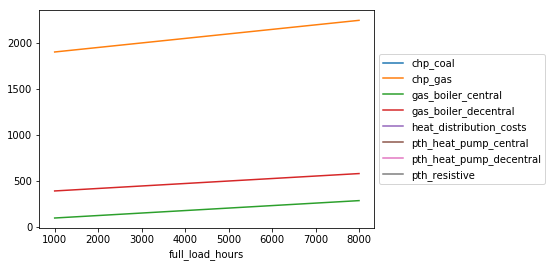

In [153]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for name, group in cost_results.groupby('technology'):
    group.plot(x='full_load_hours',
               y='total_costs',
               label=name,
               ax=ax,
               legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [154]:
emission_results = pd.DataFrame()
for full_load_hours in [1000,4000,8000]:
    emission_results = emission_results.append(get_emission_results(emission_inputs, inst_capacity, full_load_hours))

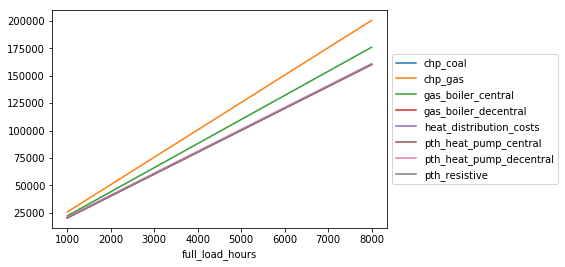

In [155]:
fig, ax = plt.subplots()
for name, group in emission_results.groupby('technology'):
    group.plot(x='full_load_hours',
               y='emissions',
               label=name,
               ax=ax,
               legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))